In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("../Data/digit/train.csv")
xtrain=train.drop(columns=["label"]).values
ytrain=train['label'].values
test=pd.read_csv("../Data/digit/test.csv")
xtest=test.values

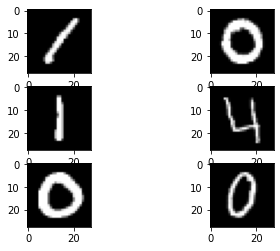

In [3]:
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(xtrain[i].reshape(28,28),cmap=plt.get_cmap('gray'))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [5]:
scaled_xtrain=scaler.transform(xtrain)
scaled_xtest=scaler.transform(xtest)

In [6]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_xtrain)

PCA()

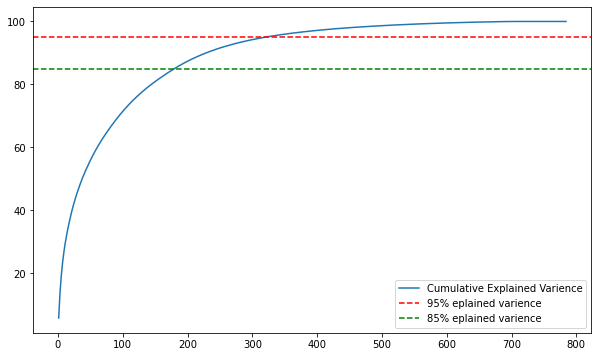

In [7]:
val=np.cumsum(pca.explained_variance_ratio_)*100
val
plt.figure(figsize=(10,6))
plt.plot(range(1,len(val)+1),val,label="Cumulative Explained Varience")
plt.axhline(y=95,color="r",linestyle="--",label="95% eplained varience")
plt.axhline(y=85,color="g",linestyle="--",label="85% eplained varience")
plt.legend()

In [8]:
pca=PCA(0.95)
pca.fit(scaled_xtrain)
pca_xtrain=pca.transform(scaled_xtrain)
pca_xtest=pca.transform(scaled_xtest)

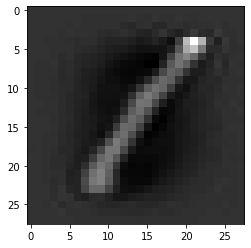

In [9]:
sample=pca.inverse_transform(pca_xtrain[0]).reshape(28,28)
plt.imshow(sample,cmap=plt.get_cmap('gray'))

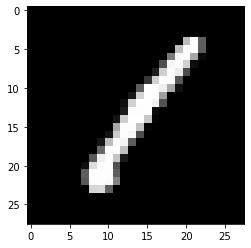

In [10]:
plt.imshow(xtrain[0].reshape(28,28),cmap=plt.get_cmap('gray'))

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(pca_xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
ypred=model.predict(pca_xtest)

In [14]:
ytest=pd.read_csv("../Data/digit/test_labels.csv")["label"]
ytest

0        2
1        0
2        9
3        7
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: label, Length: 28000, dtype: int64

### Training Accuracy

In [20]:
ypred_train=model.predict(pca_xtrain)

Accuracy: 0.9383333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.93      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.95      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.94      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



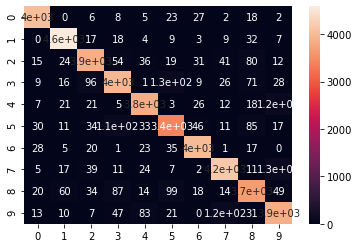

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(ytrain,ypred_train))
cm=confusion_matrix(ytrain,ypred_train)
sns.heatmap(cm,annot=True)
print(classification_report(ytrain,ypred_train))

### Testing Accuracy

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      2755
           3       1.00      1.00      1.00      2771
           4       1.00      1.00      1.00      2765
           5       1.00      1.00      1.00      2524
           6       1.00      1.00      1.00      2748
           7       1.00      1.00      1.00      2899
           8       1.00      1.00      1.00      2687
           9       1.00      1.00      1.00      2786

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000



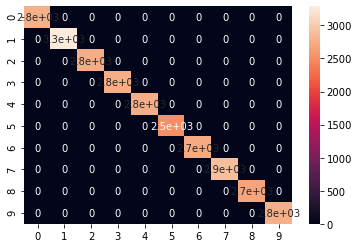

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))